In [197]:
from __future__ import print_function
import numpy as np
import statsmodels.api as sm
import pandas as pd
from pandas import DataFrame, Series 
import json
import matplotlib.pyplot as plt

import requests
from statsmodels.tsa.arima_process import arma_generate_sample
np.random.seed(12345)
%matplotlib inline

In [206]:
list_of_issues_dict_data = [json.loads(line) for line in open('SPM587SP19issues.json')]
issues_df = DataFrame(list_of_issues_dict_data)
wrangled_issues_df = issues_df[['Author','State','closed_at','created_at','issue_number','labels']]
labels = wrangled_issues_df.groupby(['created_at'])["Author"].count().reset_index()
labels.rename(columns={"Author":"data",'created_at':'dates'},inplace=True)

In [207]:
df = pd.DataFrame(labels, columns=['dates','data']).set_index('dates')
print(df)

            data
dates           
2019-03-24     1
2019-03-29     2
2019-03-30     9
2019-03-31    42
2019-04-01    12
2019-04-02    35
2019-04-03    37
2019-04-04    10
2019-04-05    27
2019-04-06     3
2019-04-07     7
2019-04-08    16
2019-04-09    33
2019-04-10    35
2019-04-11    11
2019-04-13    12
2019-04-14    10
2019-04-15    10
2019-04-16    10


In [200]:
arma_mod = sm.tsa.ARMA(df, order=(2,2))
arma_res = arma_mod.fit(trend='nc', disp=-1)

D:\Tools\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


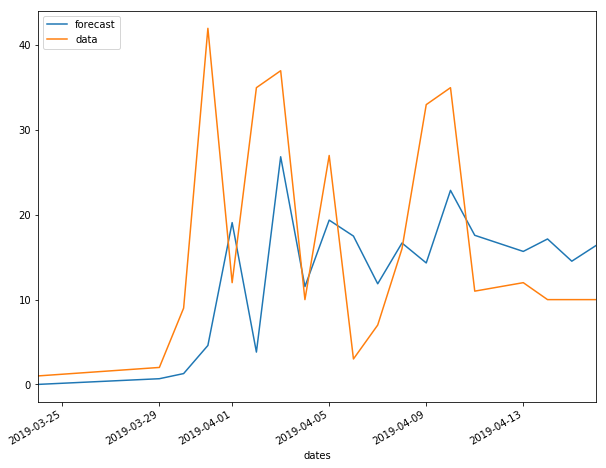

In [211]:

fig, ax = plt.subplots(figsize=(10,8))
fig = arma_res.plot_predict(ax=ax)
legend = ax.legend(loc='upper left')

[-4.06452362e-01 -4.12401259e-01 -1.96028670e-01  1.00058255e+00
  2.18215148e+00  1.71775398e+00  2.60725191e+00  1.95134206e+00
  8.86266473e-01 -5.24655356e-01 -1.29039499e+00 -2.50818482e+00
 -2.00755663e+00 -1.08292312e+00  2.15137972e-01  5.57685824e-01
  4.69084414e-01  2.81265309e+00  2.91791029e+00  1.38328084e+00
 -2.31472372e+00 -4.24799919e+00 -1.08690133e+00  3.19476474e+00
  5.17923453e+00  3.50342625e+00  1.74097535e+00  2.34407050e+00
  1.66993091e+00  1.32839836e+00  1.63586407e+00  3.25574208e+00
  2.58710251e+00  1.63386071e+00  2.33544837e+00  1.47508173e+00
  3.79158140e-01 -1.58477982e+00 -2.29526079e+00 -1.40143684e+00
 -2.55820076e-01 -3.40864769e-01 -3.32545056e-01  1.25895732e+00
  1.78063360e+00  3.41847998e-01 -7.51564343e-01 -2.55780429e+00
 -3.21700060e+00 -2.11725130e+00 -1.77817200e+00 -1.79848757e+00
 -4.10956921e-01  4.48406918e-01  2.22616220e+00  2.84948225e+00
  8.09095740e-01 -1.89433963e+00 -2.10510796e+00 -1.24931444e-01
  1.49565571e+00  2.58005

D:\Tools\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


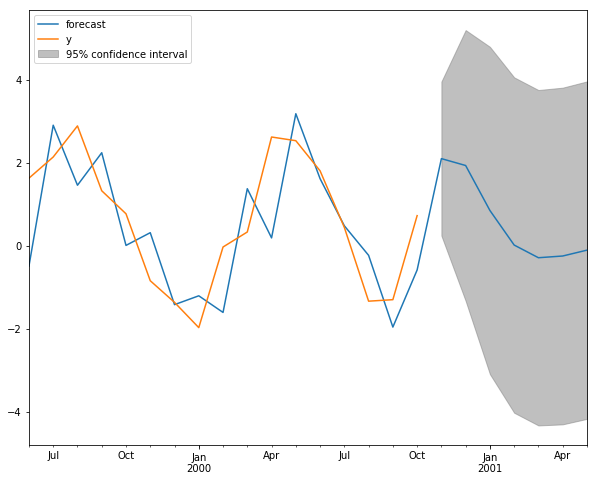

In [191]:
arparams = np.array([.75, -.25])
maparams = np.array([.65, .35])
arparams = np.r_[1, -arparams]
maparams = np.r_[1, maparams]
nobs = 250
y = arma_generate_sample(arparams, maparams, nobs)
print(y)
dates = sm.tsa.datetools.dates_from_range('1980m1', length=nobs)
help(sm.tsa.datetools)
print(dates)
y = pd.Series(y, index=dates)
arma_mod = sm.tsa.ARMA(y, order=(2,2))
arma_res = arma_mod.fit(trend='nc', disp=-1)
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,8))
fig = arma_res.plot_predict(start='1999-06-30', end='2001-05-31', ax=ax)
legend = ax.legend(loc='upper left')